<a href="https://colab.research.google.com/github/tufte28/MAT-494/blob/main/MAT494_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.3: Unconstrained Optimization

Minimization

In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective_fcn(x):
    x1=x[0]
    x2=x[1]
    return x1**2 + x1*8

def equality_constraint(x):
    x1=x[0]
    x2=x[1]
    return x1**3+x1*x2-100

def inequality_constraint(x):
    x1=x[0]
    x2=x[1]
    return x1**2+7*x2-50

bounds_x1=(-100,100)
bounds_x2=(-100,100)
bounds=[bounds_x1,bounds_x2]
constraint1={'type':'eq','fun':equality_constraint}
constraint2={'type':'ineq','fun':inequality_constraint}
constraint=[constraint1,constraint2]
x0=[1,1]

result=minimize(objective_fcn, x0, method="SLSQP", bounds=bounds, constraints=constraint)
print(result)

Convex Functions:

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, set_matplotlib_formats 
set_matplotlib_formats('pdf', 'svg')

In [11]:
f1 = lambda x : (x - 1) ** 4 + x ** 2

In [12]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f1, method='brent')
print('xmin: %.02f, fval: %.02f, iter: %d' % (res.x, res.fun, res.nit))

xmin: 0.41, fval: 0.29, iter: 12


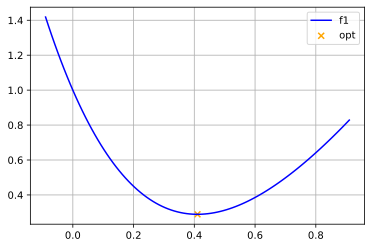

In [13]:
x = np.linspace(res.x - 0.5, res.x + 0.5, 100)
y = [f1(val) for val in x]
plt.plot(x, y, color='blue', label='f1')

# plot optima
plt.scatter(res.x, res.fun, color='orange', marker='x', label='opt')

plt.grid()
plt.legend(loc=1)

Gradient Descent Revisited

In [18]:
from scipy.optimize import fmin_ncg
# specify callback function
def get_callback_function(data_list):
    def callback_function(x):
        data_list.append(x)
    return callback_function
f2 = lambda x : x.T.dot(np.diag([2, 5])).dot(x)
def df2(x):
    # TODO: return vector of partial derivatives
    return (np.diag([2, 5]) + np.diag([2, 5]).T).dot(x)
def ddf2(x):
    # TODO: return Hessian matrix of second partial derivatives
    return np.diag([4, 10])
x0 = [-1, 1]
ncg_data = [np.array(x0)]
res = fmin_ncg(f2, x0, fprime=df2, fhess=ddf2, callback=get_callback_function(ncg_data))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 7
         Gradient evaluations: 7
         Hessian evaluations: 7


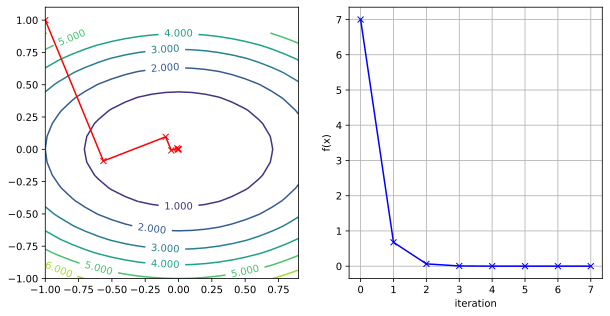

In [20]:
def plot_iterations(f, iterations, delta=0.1, box=1):
    xs = np.arange(-box, +box, delta)
    ys = np.arange(-box, +box, delta)
    X, Y = np.meshgrid(xs, ys)
    # create function mesh
    Z = np.array([[f(np.array([x, y])) for x in xs] for y in ys])
    # contour plot
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    cd = ax.contour(X, Y, Z)
    # error plot
    ax.clabel(cd, inline=1, fontsize=10)
    ax.plot(iterations[:, 0], iterations[:, 1], color='red', marker='x', label='opt')
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(range(len(iterations)), [f(np.array(step)) for step in iterations], 'xb-')
    ax.grid('on')
    ax.set_xlabel('iteration')
    ax.set_xticks(range(len(iterations)))
    ax.set_ylabel('f(x)')
plot_iterations(f2, np.array(ncg_data))
